In [50]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans 
import pylab as pl
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs


In [51]:
df = pd.read_csv("Wholesale customers data.csv")

In [52]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [53]:
from scipy.stats import zscore

df_zscore = df.apply(zscore)
df_zscore
print("original df:", df.shape)

original df: (440, 8)


In [54]:
outliers = df_zscore[(df_zscore.abs() > 3).any(axis=1)]
df = df.drop(index=outliers.index)
print("df after deleting noises:", df.shape)

df after deleting noises: (414, 8)


In [55]:
X = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [71]:
from sklearn.metrics import silhouette_score

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"k={k} → Silhouette Score = {score:.4f}")

k=2 → Silhouette Score = 0.4011
k=3 → Silhouette Score = 0.3503
k=4 → Silhouette Score = 0.3359
k=5 → Silhouette Score = 0.3110
k=6 → Silhouette Score = 0.3192
k=7 → Silhouette Score = 0.3067
k=8 → Silhouette Score = 0.2608
k=9 → Silhouette Score = 0.2606


In [65]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_scaled)
labels = kmeans.labels_

In [70]:
score = silhouette_score(X_scaled, kmeans.labels_)
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.4011


In [66]:
df['cluster'] = labels


In [67]:
print(df.head())


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  cluster  
0        1338        1  
1        1776        1  
2        7844        1  
3        1788        0  
4        5185        1  


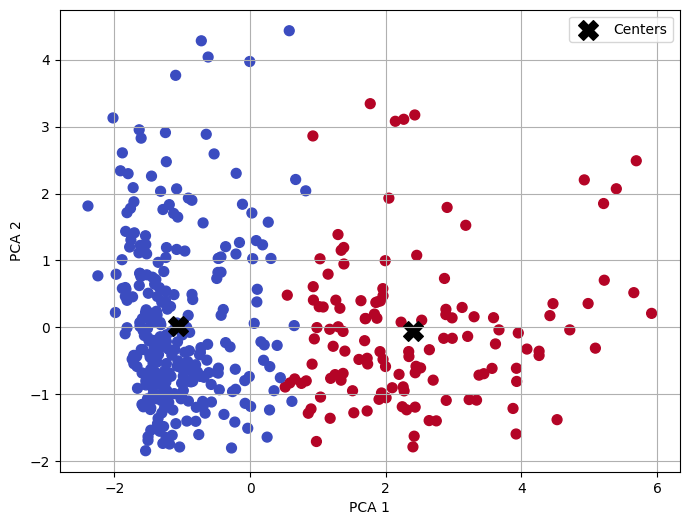

In [68]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

centers_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='coolwarm', s=50)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='black', s=200, marker='X', label='Centers')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.grid(True)
plt.show()


In [69]:
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans

kmeans1 = KMeans(n_clusters=2, random_state=0).fit(X_scaled)
kmeans2 = KMeans(n_clusters=2, random_state=42).fit(X_scaled)

ari = adjusted_rand_score(kmeans1.labels_, kmeans2.labels_)
print(f"ARI = {ari:.4f}")

ARI = 1.0000


In [62]:
X = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen', 'Channel']]
X_scaled = StandardScaler().fit_transform(X)
kmeans_all = KMeans(n_clusters=2, random_state=0).fit(X_scaled)


In [63]:
new_X = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]
new_X_scaled = StandardScaler().fit_transform(new_X)
kmeans_no = KMeans(n_clusters=2, random_state=0).fit(new_X_scaled)


In [64]:
ari_feat_test = adjusted_rand_score(kmeans_all.labels_, kmeans_no.labels_)
print(f"ARI = {ari_feat_test:.4f}")


ARI = 0.6439
